In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [4]:
df = {
    'age': [21,19,20,30,25],
    'height': [180,160,170,145,149],
    'weight': [55,60,70,55,65]
}

dataframe = pd.DataFrame(df)
dataframe

,age,height,weight
0,21,180,55
1,19,160,60
2,20,170,70
3,30,145,55
4,25,149,65


# Standard Scaling ( -3, +3 )

In [92]:
scalar = StandardScaler()
scaled_df = dataframe.copy()
scaled_df = scalar.fit_transform(scaled_df)
scaled_df

array([[-0.4938648 ,  1.47884946, -1.02899151],
       [-0.9877296 , -0.06161873, -0.17149859],
       [-0.7407972 ,  0.70861537,  1.54348727],
       [ 1.72852679, -1.21696987, -1.02899151],
       [ 0.4938648 , -0.90887623,  0.68599434]])

# STANDARD SCALING IS ACTUALKY Z-SCORE WHICH I'VE APPLIED ON **AGE** COLUMN

In [5]:
import numpy as np

temp_df = dataframe.copy()

# Step 3: Calculate the mean and standard deviation (std)
mean_age = np.mean(temp_df['age'])
std_age = np.std(temp_df['age'])

mean_weight = np.mean(temp_df['weight'])
std_weight = np.std(temp_df['weight'])

mean_height = np.mean(temp_df['height'])
std_height = np.std(temp_df['height'])

# Step 4: Calculate the Z-Score
temp_df['Z-Score-AGE'] = (temp_df['age'] - mean_age) / std_age
temp_df['Z-Score_height'] = (temp_df['height'] - mean_height) / std_height
temp_df['Z-Score_weight'] = (temp_df['weight'] - mean_weight) / std_weight

temp_df

,age,height,weight,Z-Score-AGE,Z-Score_height,Z-Score_weight
0,21,180,55,-0.493865,1.478849,-1.028992
1,19,160,60,-0.987730,-0.061619,-0.171499
2,20,170,70,-0.740797,0.708615,1.543487
3,30,145,55,1.728527,-1.216970,-1.028992
4,25,149,65,0.493865,-0.908876,0.685994


In [94]:
scaled_df = pd.DataFrame(scaled_df)

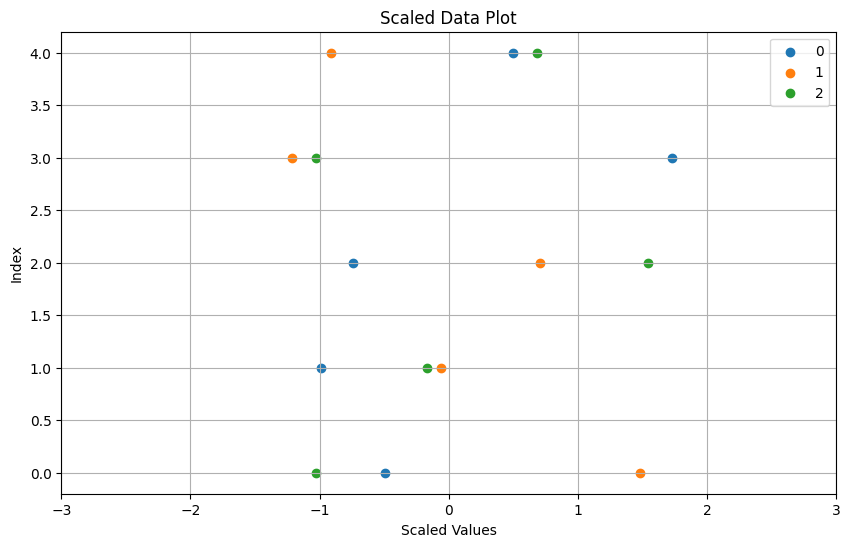

In [95]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
for column in scaled_df.columns:
    plt.scatter(scaled_df[column], scaled_df.index, label=column)
plt.title('Scaled Data Plot')
plt.xlabel('Scaled Values')
plt.ylabel('Index')
plt.xlim(-3, 3)  # Set x-axis limits
plt.legend()
plt.grid(True)
plt.show()

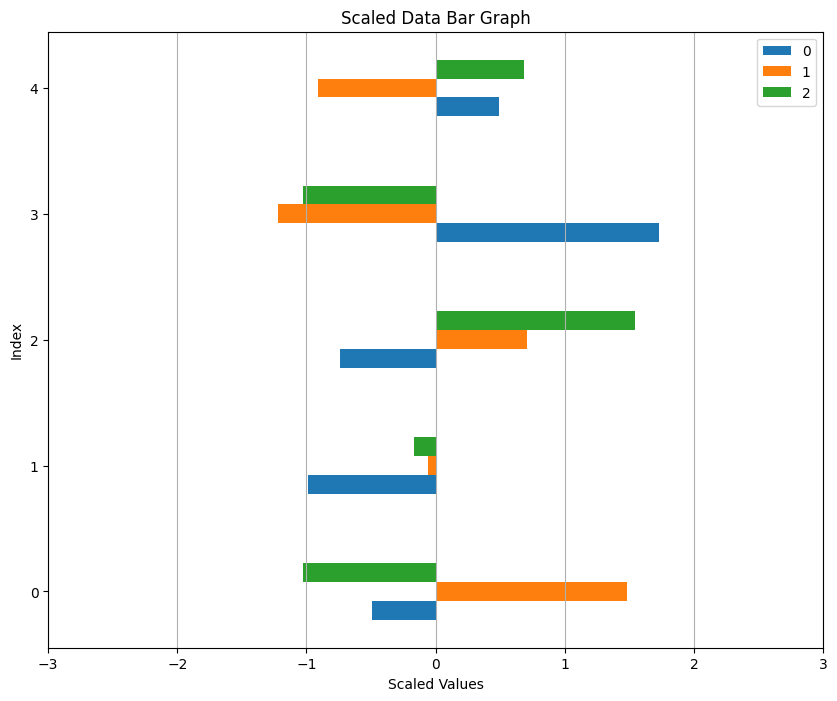

In [96]:
# Plotting the data as a bar graph
plt.figure(figsize=(10, 8))
bar_width = 0.15
index = scaled_df.index
for i, column in enumerate(scaled_df.columns):
    plt.barh( index + i * bar_width, scaled_df[column], bar_width, label=column)

plt.title('Scaled Data Bar Graph')
plt.xlabel('Scaled Values')
plt.ylabel('Index')
plt.xlim(-3, 3)  # Set x-axis limits
plt.yticks(index + bar_width, index)
plt.legend()
plt.grid(True, axis='x')
plt.show()

# Min-Max Scalar range( 0 , 1 )

The formula is:

𝑋 (scaled) = 𝑋 − 𝑋(min) / 𝑋(max) − 𝑋(min)

**Where**:

𝑋 : X is the original value.

𝑋(min) : is the minimum value of the feature.

𝑋(max) : is the maximum value of the feature.

In [7]:
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(dataframe)
# convert into Scaled_data into dataframe
scaled_data = pd.DataFrame(scaled_data, columns=dataframe.columns)
scaled_data

,age,height,weight
0,0.181818,1.000000,0.000000
1,0.000000,0.428571,0.333333
2,0.090909,0.714286,1.000000
3,1.000000,0.000000,0.000000
4,0.545455,0.114286,0.666667


# Max-Absolute Scalar ( -1, +1 )

X(scaled) = X / | X(max) |
​

Where: 

X is the original value.

∣ X(max) ∣ is the maximum absolute value (+ve) of the feature.


In [101]:
scalar = MaxAbsScaler()
scaled_data = scalar.fit_transform(dataframe)

# convert into Scaled_data into dataframe
scaled_df = pd.DataFrame(scaled_data, columns=dataframe.columns)
scaled_df

,age,height,weight
0,0.700000,1.000000,0.785714
1,0.633333,0.888889,0.857143
2,0.666667,0.944444,1.000000
3,1.000000,0.805556,0.785714
4,0.833333,0.827778,0.928571


# RobustScaler

In [102]:
scalar = RobustScaler()
scaled_data = scalar.fit_transform(dataframe)
# convert into Scaled_data into dataframe
scaled_df = pd.DataFrame(scaled_data, columns=dataframe.columns)
scaled_df

,age,height,weight
0,0.0,0.952381,-0.5
1,-0.4,0.000000,0.0
2,-0.2,0.476190,1.0
3,1.8,-0.714286,-0.5
4,0.8,-0.523810,0.5


# TRANSFORMATION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
np.random.seed(0)
df = np.random.exponential(size = 1000, scale = 2)
df = pd.DataFrame(df, columns = ['values'])
df.head(10)

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
5,2.076319
6,1.151038
7,4.447049
8,6.629824
9,0.967204


<Axes: xlabel='values', ylabel='Count'>

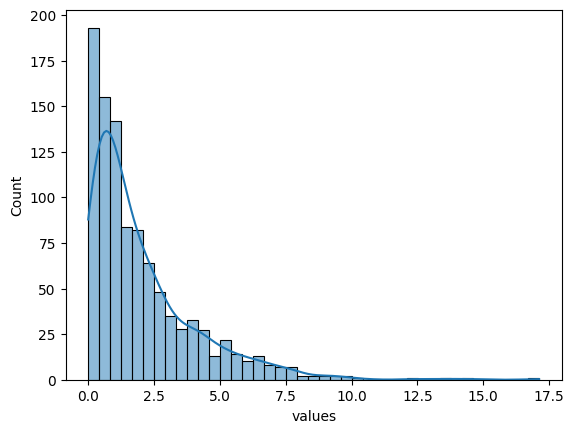

In [7]:
sns.histplot(df['values'], kde=True)

In [15]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method="box-cox")
pt_yeo_johnson = PowerTransformer(method="yeo-johnson")
qt_normal = QuantileTransformer(output_distribution='normal')

# Box cox k lie values positive honi chaiye

df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

df

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,-1.390405,-1.390405,-1.315958
996,1.446892,0.077828,0.077828,0.074087
997,5.574577,1.527375,1.527375,1.475269
998,0.519217,-0.862872,-0.862872,-0.748009


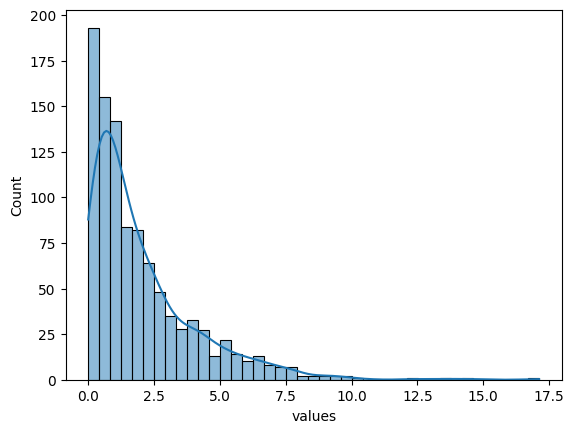

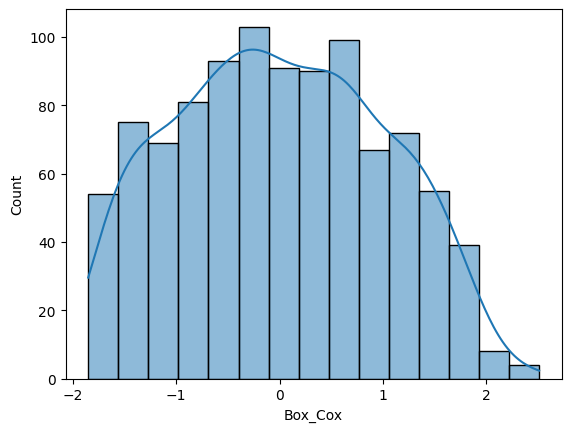

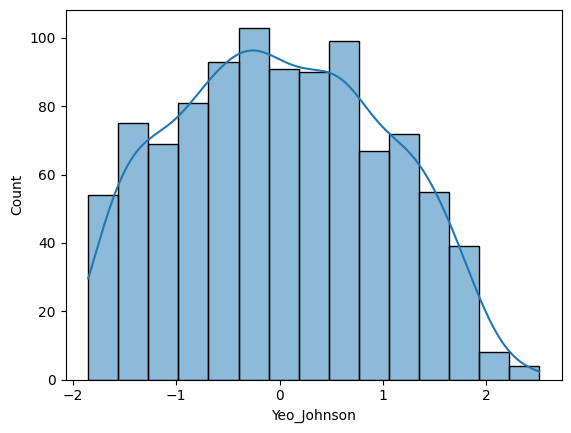

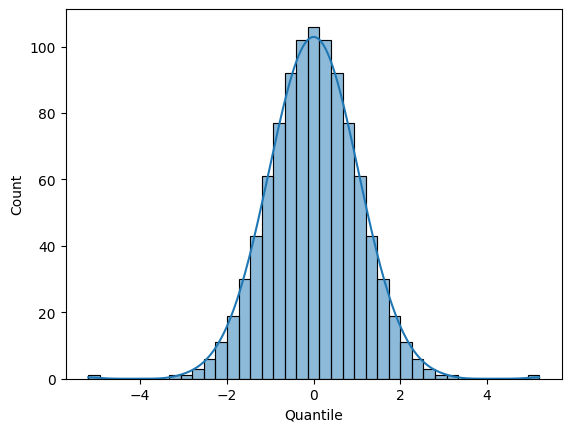

In [16]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

# NORMALIZATON

L2 NORMALIZTION = square of the sum of all the values in each row / total no. of values in that row.

In [21]:
from sklearn.preprocessing import Normalizer
   
data = [[1,1,1],[1,1,0],[1,0,0]]    

normalizer = Normalizer(norm="l2")
print(normalizer.fit_transform(data))    

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 NORMALIZER " sum of all the values in each row equals to 1 "

In [22]:
data = [[1,1,1],[1,1,0],[1,0,0]]    

normalizer = Normalizer(norm="l1")
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# LOG TRANSFORM

In [31]:
import numpy as np

data = {
      "values" :[1,5,10,15,30,50,100,160,210,400,600,1000,40000,90000,1200000]
        }
df = pd.DataFrame(data)

df['log_values'] = np.log(data["values"])
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,15,2.708050
4,30,3.401197
5,50,3.912023
6,100,4.605170
7,160,5.075174
8,210,5.347108
9,400,5.991465


# **LOG TRANSFORMER** USING SKLEARN FUNCTIONAL_TRANSFORMER

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

# Original data
data = {
    "values": [1, 5, 10, 15, 30, 50, 100, 160, 210, 400, 600, 1000, 40000, 90000, 1200000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Applying log transformation using np.log1p (log1p is log(1 + x))
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Transforming the 'values' column and storing the result in 'log_values'
log_data = log_transformer.fit_transform(df[['values']])  # Reshaping done internally by pandas

# Adding the transformed data as a new column in the DataFrame
df['log_values'] = log_data

df

,values,log_values
0,1,0.693147
1,5,1.791759
2,10,2.397895
3,15,2.772589
4,30,3.433987
5,50,3.931826
6,100,4.615121
7,160,5.081404
8,210,5.351858
9,400,5.993961
